### Recuperación de recursos de la web

Se van a mostrar varias formas de recuperar recursos que se encuentran en la web:

* Recuperación via http

* Recuperación con el módulo urllib.

* Recuperación con el módulo Request

__Recuperación via http__

Un socket proporciona una conexión de doble sentido entre dos programas, de manera que es posible tanto leer como escribir en el mismo socket. Si se escribe algo en un socket, es enviado hacia la aplicación que está al otro lado del socket. Si se lee desde un socket, se obtienen los datos que la otra aplicación ha enviado.

En Python existe un soporte integrado para los sockets.

El protocolo para el intercambio de recursos web es HTTP. En este  protocolo para pedir un documento a un servidor web se escribe una línea en la cual el segundo parámetro es la página web que estamos solicitando, y a continuación enviamos una línea en blanco:

            GET servidor web HTTP/1.0

El servidor web responderá con una cabecera que contiene cierta información acerca del documento y una línea en blanco, seguido por el contenido del documento.

En el siguiente ejemplo se va a recuperar una imagen. Para ello se realiza una conexión con el puerto 80 del servidor y se envía el comando GET seguido por una línea en blanco. Una vez enviada la línea en blanco, se utiliza un bucle que recibe los datos desde el socket en bloques de 512 caracteres y se  imprime en pantalla hasta que no quedan más datos por leer (recv() devuelve una cadena vacía).

In [39]:
import socket

misock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
misock.connect(('www.vialibre-ffe.com', 80))
cmd = 'GET https://www.vialibre-ffe.com/multimedia/galerias/IRUN120/2Alvia_120.jpg HTTP/1.0\r\n\r\n'.encode()
misock.send(cmd)

while True:
    datos = misock.recv(512)
    if (len(datos) < 1):
        break
    print(datos)
misock.close()

b'HTTP/1.1 200 OK\r\nContent-Type: image/jpeg\r\nLast-Modified: Mon, 23 Mar 2015 09:49:55 GMT\r\nAccept-Ranges: bytes\r\nETag: "163b76b74e65d01:0"\r\nServer: Microsoft-IIS/8.5\r\nX-Powered-By: ASP.NET\r\nDate: Mon, 30 Oct 2017 15:49:07 GMT\r\nConnection: close\r\nContent-Length: 62887\r\n\r\n\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x01\xbd\x02\xbc\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06'
b'

La salida comienza con las cabecera que el servidor web envía para describir el documento. Por ejemplo Content-Type indica que es imagen en formato jpeg (image/jpeg). A continuación de la cabecera, añade una línea en blanco para indicar el final de la misma, y envía los datos reales del fichero.


Se puede mejorar el programa guardando los datos en una cadena, recortando las cabeceras y luego guardando los datos de la imagen en un archivo.

In [40]:
import socket
import time

misock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
misock.connect(('www.vialibre-ffe.com', 80))
cmd = 'GET https://www.vialibre-ffe.com/multimedia/galerias/IRUN120/2Alvia_120.jpg HTTP/1.0\r\n\r\n'.encode()
misock.send(cmd)
contador=0
imagen="".encode()
while True:
    datos = misock.recv(5120)
    if (len(datos) < 1):
        break
    imagen=imagen+datos
misock.close()

#Búsqueda del final de la cabecera
pos=imagen.find("\r\n\r\n".encode())
print (imagen[:pos])

#Saltar la cabecera y guardar los datos de la imagen
imagen=imagen[pos+4:]
manf=open("tren.jpg","wb")
manf.write(imagen)
manf.close()

b'HTTP/1.1 200 OK\r\nContent-Type: image/jpeg\r\nLast-Modified: Mon, 23 Mar 2015 09:49:55 GMT\r\nAccept-Ranges: bytes\r\nETag: "163b76b74e65d01:0"\r\nServer: Microsoft-IIS/8.5\r\nX-Powered-By: ASP.NET\r\nDate: Mon, 30 Oct 2017 15:49:32 GMT\r\nConnection: close\r\nContent-Length: 62887'


Una vez que el programa termina, se pueden ver los datos de la imagen abriendo el archivo tren.jpg con un editor de imágenes.

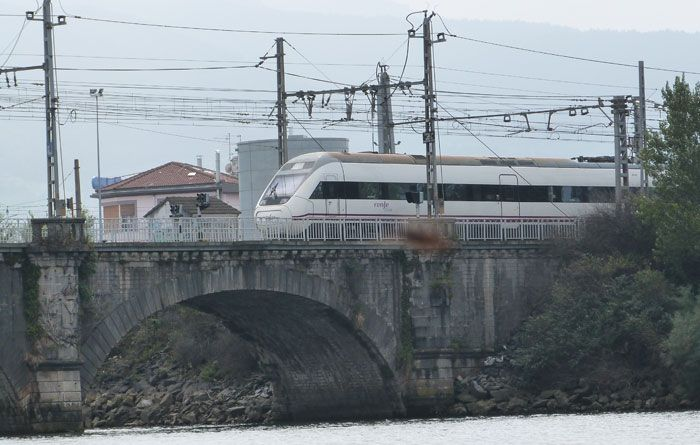

In [43]:
from IPython.display import Image
Image(filename='tren.jpg')

__Recuperación con el módulo urllib__

urllib es una librería que permite tratar una página web de forma parecida a la apertura de un fichero, de forma que la librería gestiona de manera transparente todo lo referente al protocolo HTTP y los detalles de la cabecera.

Una vez que la página web ha sido abierta con urllib.request.urlopen, se puede tratar como un archivo y leer a través de ella usando un bucle for.

Cuando se recupera la página web, sólo se accede al contenido puesto las cabeceras aunque se envián,  el código de urllib se queda con ellas y sólo devuelve los datos.

En el siguiente ejemplo se recupera la información de una página web

In [45]:
import urllib.request

manf = urllib.request.urlopen('http://informatica.ucm.es')
for line in manf:
    print(line.decode().strip())

<!DOCTYPE html>
<html lang="es">
<head>
<meta charset="UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1">
<title>Facultad de Informática</title>

<meta name="description" content="La Universidad Complutense de Madrid es una institución de larga trayectoria y amplio reconocimiento social que aspira a situarse entre las primeras universidades de Europa y a consolidarse como centro de referencia para el continente latinoamericano" />
<meta name="keywords" content="Universidad Complutense de Madrid, Complutense, UCM, Educación, Innovación, Universidad de excelencia, Formación, Grado, Máster, Doctorado, Postgrado" />
<link rel="apple-touch-icon" href="/themes/ucm16/media/img/logoucm.ico" />
<link rel="shortcut icon" href="/themes/ucm16/media/img/logoucm.ico" />
<link rel="icon" href="/themes/ucm16/media/img/logoucm.ico" />
<link type="text/css" media="screen" rel="stylesheet" href="/themes/ucm16/css/bootstrap.

En el siguiente programa se procesa la información de un página web y se calcula la frecuencia de cada palabra:

In [2]:
import urllib.request
contadores=dict()
manf = urllib.request.urlopen('http://informatica.ucm.es')
for linea in manf:
    palabras=linea.split()
    for palabra in palabras:
        contadores[palabra]=contadores.get(palabra,0)+1
print (contadores)

{b'<!DOCTYPE': 1, b'html>': 1, b'<html': 1, b'lang="es">': 1, b'<head>': 1, b'<meta': 5, b'charset="UTF-8"': 1, b'/>': 14, b'http-equiv="X-UA-Compatible"': 1, b'content="IE=edge">': 1, b'name="viewport"': 1, b'content="width=device-width,': 1, b'initial-scale=1">': 1, b'<title>Facultad': 1, b'de': 42, b'Inform\xc3\xa1tica</title>': 1, b'name="description"': 1, b'content="La': 1, b'Universidad': 3, b'Complutense': 5, b'Madrid': 1, b'es': 1, b'una': 3, b'instituci\xc3\xb3n': 1, b'larga': 1, b'trayectoria': 1, b'y': 20, b'amplio': 1, b'reconocimiento': 1, b'social': 1, b'que': 2, b'aspira': 1, b'a': 4, b'situarse': 1, b'entre': 1, b'las': 3, b'primeras': 1, b'universidades': 1, b'Europa': 1, b'consolidarse': 1, b'como': 2, b'centro': 1, b'referencia': 1, b'para': 4, b'el': 5, b'continente': 1, b'latinoamericano"': 1, b'name="keywords"': 1, b'content="Universidad': 1, b'Madrid,': 1, b'Complutense,': 1, b'UCM,': 1, b'Educaci\xc3\xb3n,': 1, b'Innovaci\xc3\xb3n,': 1, b'excelencia,': 1, b'Form

La librería urllib también se puede utilizar para recuperar ficheros que no son de texto  como un archivo de imagen o de video, y para los que se requiere hacer una copia de la URL en un archivo local.

En estos casos se usa el método read para descargar el contenido completo del documento en una variable de tipo cadena y luego escribir la información a un archivo local.

In [5]:
import urllib.request
img = urllib.request.urlopen('https://www.vialibre-ffe.com/multimedia/galerias/trenesdeantes/03.jpg').read()
manf=open("portada.jpg","wb")
manf.write(img)
manf.close()

El programa lee todos los datos de una sola vez a través de la red y los almacena en la variable img en la memoria principal  y luego abre el fichero portada.jpg y escribe los datos en el disco. Esto funciona sólo si el tamaño del fichero es menor que el tamaño de la memoria del PC.

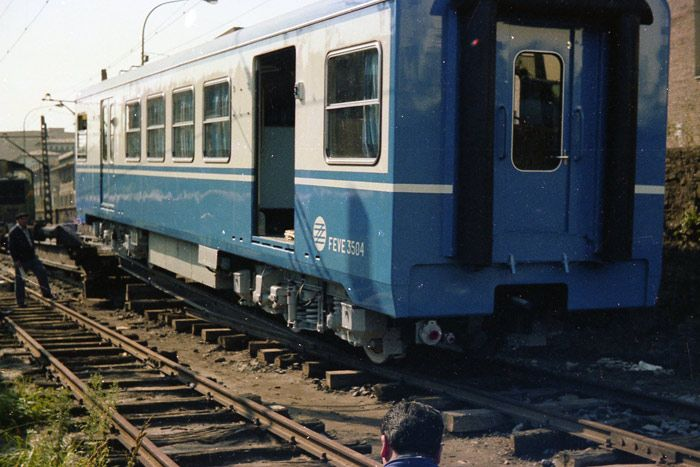

In [6]:
from IPython.display import Image
Image(filename='portada.jpg')

Pero si se trata de un fichero demasiado grande el programa puede fallar cuando el equipo se quede sin memoria. Para evitar agotar la memoria, se puede recuperar los datos en bloques, y luego escribir cada bloque en el disco antes de recuperar el siguiente. De este modo el programa puede leer archivos de cualquier tamaño sin usar toda la memoria del equipo.

En este ejemplo, se leen 100.000 caracteres cada vez y luego se escriben esos caracteres en el archivo portada.jpg, antes de recuperar los 100.000 caracteres siguientes.

In [9]:
import urllib.request
img = urllib.request.urlopen('https://www.vialibre-ffe.com/multimedia/galerias/trenesdeantes/03.jpg')
manf=open("portada.jpg","wb")
tamano=0
while True:
    info=img.read(100000)
    if len(info)<1:
        break
    tamano=tamano+len(info)
    manf.write(info)
print(tamano," caracteres copiados")
manf.close()

68100  caracteres copiados


Una versión más sofisticada sería:

In [11]:
import os
import urllib.request
print ("Entrar una url")
urlstr=input().strip()
img = urllib.request.urlopen(urlstr)
words=urlstr.split('/')
fname=words[-1]

if os.path.exists(fname):
    if input("¿Reemplazar archivo "+" S/n?")!="S":
        print ("Datos no copiados")
        exit()
    print ("Reemplazando datos",fname)


manf=open(fname,"wb")
tamano=0
while True:
    info=img.read(100000)
    if len(info)<1:
        break
    tamano=tamano+len(info)
    manf.write(info)
print(tamano," caracteres copiados ", fname)
manf.close()

Entrar una url
https://www.vialibre-ffe.com/multimedia/galerias/trenesdeantes/17.jpg
¿Reemplazar archivo  S/n?S
Reemplazando datos 17.jpg
90044  caracteres copiados  17.jpg


__Recuperación con el módulo request__

El módulo requests permite bajarse archivos de la red de una forma transparente. No se encuentra instalado por defecto con Python.

La función get() del módulo requests toma una cadena que representa la url que se quiere descargar. El resultado de la llamada es un objeto de tipo Response que contiene la respuesta que el servidor web devuelve como respuesta a la petición.

En el ejemplo además de recuperar la pagina descrita, se ha comprobado que la descarga se ha realizado con éxito chequeando el valor del atributo status_code del objeto Response. Si el valor que toma es requests.codes.ok significa que se ha realizado correctamente, y la descargada se ha almacenado como una cadena en la variable text del objeto Response.

Otra forma de comprobar si una descarga se ha realizado con éxito consiste en utilizar el método raise_for_status() del objeto Response. Este método lanzará una excepción si se ha producido algún error en la descarga y no hará nada en caso de que la descarga se haya realizado con éxito. Es por ello que una buena práctica consiste en encerrar la llamada al método raise_for_status() entre un try/except con el objetivo de tratar los casos en que se produzca una descarga errónea.

Observar que es la llamada al método __raise_for_status()__ hay que realizarlo siempre después de llamar al método __requests.get()__ dado que el objetivo es asegurarse que la descarga se realizó con éxito antes de que el programa continúe su ejecución.

Una vez que ha realizado la descarga, lo que interesa es guardar el contenido en un archivo. Para ello se puede utilizar la función __open()__ y el método __write()__. En este sentido lo primero que hay que hacer es abrir un fichero en modo __“wb”__(escribir un modo binario), y a continuación escribir al fichero usando un bucle for que utilice el método __iter_content__ del objeto __Response__.

Observar que el método iter_content recupera bloques de contenido en cada iteración a través del bucle. Cada bloque es un conjunto de bytes de datos en un tamaño igual al especificado. Así  mismo observar que el método __write()__ retorna el número de bytes escritos al fichero.

### Web Scraping

El “web scraping” consiste en escribir un programa que finge ser un navegador web y recupera páginas, examinando luego los datos de esas páginas para encontrar ciertos patrones.

Por ejemplo los buscadores:

* Buscan en el código de una página web, extraen los enlaces a otras páginas y recuperan esas páginas, extrayendo los enlaces que haya en ellas y así sucesivamente. 

* Usan la frecuencia con que las páginas que encuentra enlazan hacia una página concreta para calcular la “importancia” de esa página, y la posición en la que debe aparecer dentro de sus resultados de búsqueda.

Se van a estudiar dos formas de analizar páginas web:

* Mediante expresiones regulares.

* Mediante la librería BeautifulSoup.



__Expresiones regulares__

Un forma fácil de analizar HTML consiste en utilizar expresiones regulares para hacer búsquedas repetidas que extraigan subcadenas coincidentes con un modelo concreto.

Considerar por ejemplo una página web que contiene enlaces y se quieren detectar dicho enlaces. Para ello se podría construir una expresión regular  que busque y extraiga los valores de los enlaces:

                                  href=("http://.+?")
                  
La expresión regular busca cadenas que comiencen por “href=”http://”, seguido de uno o más caracteres (“.+?”), seguidos por otra comilla doble. El signo de interrogación añadido a “.+?” indica que se busca la cadena coincidente más pequeña posible.  Por último se añaden paréntesis a la expresión regular para indicar qué parte de la cadena localizada se quiere extraer.

In [16]:
import urllib.request
import re
url=input("Introduzca url: ")
html=str(urllib.request.urlopen(url).read())
enlaces=re.findall('href="(http://.+?)"',html)
for enlace in enlaces:
    print(enlace)

Introduzca -http://informatica.ucm.es
http://informatica.ucm.es/
http://biblioteca.ucm.es/fdi
http://informatica.ucm.es/asistencia
http://informatica.ucm.es/investigacion
http://informatica.ucm.es/investigacion
http://informatica.ucm.es/eventos-y-conferencias
http://www.fdi.ucm.es/migs/
http://www.ucm.es/BUCM/revcul/sci-fdi/
http://www.ucm.es/csim
http://www.fdi.ucm.es/cfi/
http://www.ucm.es/fundacion
http://www.ucm.es/ucm-en-linea
http://informatica.ucm.es/laboratorios-fdi
http://Informatica.ucm.es/buzon-de-sugerencias-y-quejas
http://www.campusmoncloa.es/
http://informatica.ucm.es/rss/rss.php?weid=26


El método findall de las expresiones regulares proporciona una lista de todas las cadenas que coinciden con la expresión regular, devolviendo sólo el texto del enlace situado dentro de las comillas dobles.

Las expresiones regulares funcionan bien cuando el HTML está bien formado y es predecible. Sin embargo si el HTML no está bien construido, se pueden perder parte de los enlaces correctos, o terminar obteniendo datos erróneos.

__BeautifulSoup__

BeautifulSoup es un módulo para extraer información de un página web.

Se puede descargar e “instalar” desde http://www.crummy.com/software/ o simplemente colocar el archivo BeautifulSoup.py en la misma carpeta que nuestra aplicación.

En este ejemplo se va analizar una página web y se van a extraer todos sus enlaces. Para ello el programa solicita una dirección web, luego abre la página web usando urllib, se leen los datos y se los pasa al analizador BeautifulSoup, que recupera todas las etiquetas de anclas(a) e imprime en pantalla el atributo href de cada una de ellas.

In [20]:
import urllib
from bs4 import BeautifulSoup
url=input("Introduzca url: ")
html=urllib.request.urlopen(url).read()
soup=BeautifulSoup(html, 'html.parser')
etiquetas=soup("a")
for etiqueta in etiquetas:
    print (etiqueta.get("href",None))

Introduzca url: http://informatica.ucm.es
https://www.ucm.es/login_sso/
https://www.ucm.es/
http://informatica.ucm.es/
/facultad
/presentacion
/gobierno
/departamentos_1
/facultad
/estudiar
/grado
/master
/doctorado
/titulos-propios
/estudiar
/estudiantes
/programacion-docente
/practicas-de-formacion
/mentorias-academicas
/secretaria
/programas-de-movilidad
/estudiantes
/asistencia
/infraestructuras
http://biblioteca.ucm.es/fdi
https://cv.ucm.es/CampusVirtual/jsp/index.jsp
https://e-administracion.ucm.es/
http://informatica.ucm.es/asistencia
/asistencia
/investigacion
/grupos-y-lineas-de-investigacion
/oai
http://informatica.ucm.es/investigacion
/investigacion
/buzon-de-sugerencias-y-quejas
/grupos-y-lineas-de-investigacion
/oai
http://informatica.ucm.es/investigacion
/investigacion
http://informatica.ucm.es/eventos-y-conferencias
https://informatica.ucm.es/delegacion-y-asociaciones
http://www.fdi.ucm.es/migs/
http://www.ucm.es/BUCM/revcul/sci-fdi/
https://informatica.ucm.es/estudios/g

Observar que el método BeautifulSoup() también admite como entrada un archivo html que esté descargado en el disco duro local.

In [21]:
import urllib
from bs4 import BeautifulSoup
html=open("Facultad de Informática.html")
soup=BeautifulSoup(html, 'html.parser')
etiquetas=soup("a")
for etiqueta in etiquetas:
    print (etiqueta.get("href",None))

https://www.ucm.es/login_sso/
https://www.ucm.es/
http://informatica.ucm.es/
http://informatica.ucm.es/facultad
http://informatica.ucm.es/presentacion
http://informatica.ucm.es/gobierno
http://informatica.ucm.es/departamentos_1
http://informatica.ucm.es/facultad
http://informatica.ucm.es/estudiar
http://informatica.ucm.es/grado
http://informatica.ucm.es/master
http://informatica.ucm.es/doctorado
http://informatica.ucm.es/titulos-propios
http://informatica.ucm.es/estudiar
http://informatica.ucm.es/estudiantes
http://informatica.ucm.es/programacion-docente
http://informatica.ucm.es/practicas-de-formacion
http://informatica.ucm.es/mentorias-academicas
http://informatica.ucm.es/secretaria
http://informatica.ucm.es/programas-de-movilidad
http://informatica.ucm.es/estudiantes
http://informatica.ucm.es/asistencia
http://informatica.ucm.es/infraestructuras
http://biblioteca.ucm.es/fdi
https://cv.ucm.es/CampusVirtual/jsp/index.jsp
https://e-administracion.ucm.es/
http://informatica.ucm.es/asist

El método BeautifulSoup() genera un objeto de tipo BeautifulSoup que tiene un conjunto de métodos que se pueden utilizar para localizar partes específicas de un documento html.

En el siguiente ejemplo se van a extraer varías partes de una etiqueta.

In [22]:
import urllib
from bs4 import BeautifulSoup
url=input("Introduzca url: ")
html=urllib.request.urlopen(url).read()
soup=BeautifulSoup(html, 'html.parser')
#Recupera todas las etiquetas de anclaje
etiquetas=soup("a")
#Busca las partes de una etiqueta
for etiqueta in etiquetas:
    print("ETIQUETA: ", etiqueta)
    print("URL:",etiqueta.get("href",None))
    print("Contenidos:",str(etiqueta.contents[0]))
    print("Atributos:",etiqueta.attrs)

Introduzca url: http://informatica.ucm.es
ETIQUETA:  <a href="https://www.ucm.es/login_sso/" title="Navegar identificado">Navegar identificado</a>
URL: https://www.ucm.es/login_sso/
Contenidos: Navegar identificado
Atributos: {'href': 'https://www.ucm.es/login_sso/', 'title': 'Navegar identificado'}
ETIQUETA:  <a href="https://www.ucm.es/" title="Universidad Complutense de Madrid">
<img alt="ucm" src="/themes/ucm16/media/img/logo.png" title="Universidad Complutense de Madrid"/>
</a>
URL: https://www.ucm.es/
Contenidos: 

Atributos: {'href': 'https://www.ucm.es/', 'title': 'Universidad Complutense de Madrid'}
ETIQUETA:  <a href="http://informatica.ucm.es/" title="Portada - Facultad de Informática">Facultad de Informática</a>
URL: http://informatica.ucm.es/
Contenidos: Facultad de Informática
Atributos: {'href': 'http://informatica.ucm.es/', 'title': 'Portada - Facultad de Informática'}
ETIQUETA:  <a class="dropdown-toggle" data-toggle="dropdown" href="/facultad" title="Facultad">Faculta

En general BeautifulSoup se puede usar para diferentes acciones:

* Imprimir un documento

* Parsear un documento html

* Analizar un documento html


__Imprimir un documento html__

Existen varios métodos para imprimir un documento:

* La función __str()__ muestra el documento como una cadena, pero no elimina nodos que solo tengan un espacio en blanco ni añade espacios en blanco entre los nodos.

* La función __prettify()__ añade nuevas líneas y espacios para mostrar la estructura del documento html, y elimina nodos que solo contengan espacios en blanco.

* La función __encode_contents__ muestra el documento como una cadena en la codificación dada, y si no se indica se muestra como una cadena unicode.

In [29]:
from bs4 import BeautifulSoup
doc="<html><h1>Cabecera</h1><p>Text"
soup=BeautifulSoup(doc, 'html.parser')
print(str(soup))
print()
print(soup.encode_contents())
print()
print(soup.__str__())
print()
print(soup.prettify())

<html><h1>Cabecera</h1><p>Text</p></html>

b'<html><h1>Cabecera</h1><p>Text</p></html>'

<html><h1>Cabecera</h1><p>Text</p></html>

<html>
 <h1>
  Cabecera
 </h1>
 <p>
  Text
 </p>
</html>


Las funciones __str__ y __encode_contents__ no funcionan igual cuando se usa sobre una etiqueta dentro del documento. En el caso de __str__ se imprime la etiqueta y sus contenidos y en el caso de __encode_contents__ solo se imprimen los contenidos.

In [37]:
from bs4 import BeautifulSoup
doc="<html><h1>Cabecera</h1><p>Text"
soup=BeautifulSoup(doc, 'html.parser')
cabecera=soup.h1
print (str(cabecera))
print()
print(cabecera.encode_contents())

<h1>Cabecera</h1>

b'Cabecera'


Cuando se llama a __str__, __prettify__ o __encode_contents__ se puede especifica la codificación de salida de la cadena. Por defecto es UTF-8

In [36]:
from bs4 import BeautifulSoup
doc="Sacr\xe9 bleu!"
soup=BeautifulSoup(doc, 'html.parser')
print(str(soup))
print(soup.prettify(encoding="ISO-8859-1"))
print(soup.prettify(encoding="UTF-16"))
print(soup.prettify(encoding="EUC-JP"))

Sacré bleu!
b'Sacr\xe9 bleu!\n'
b'\xff\xfeS\x00a\x00c\x00r\x00\xe9\x00 \x00b\x00l\x00e\x00u\x00!\x00\n\x00'
b'Sacr\x8f\xab\xb1 bleu!\n'


Si el documento original contenía una especificación de codificación entonces se reescribe cuando se convierte a cadena a UTF-8

In [39]:
from bs4 import BeautifulSoup
doc="""<html>
<meta http-equiv="Content-type" content=test/html; charset=ISO-Latin-1">
Sacr\xe9 bleu!
</html>"""
print (BeautifulSoup(doc, 'html.parser').prettify())

<html>
 <meta charset="utf-8" content="test/html;" http-equiv="Content-type">
  Sacré bleu!
 </meta>
</html>


__Parsear un documento html__

BeautifulSoup toma un documento html y lo parsea a una estructura de datos en forma de árbol. Si el documento está bien formado el árbol se parece al documento original pero si no lo está entonces usa heurísticas para conseguir una estructura razonable. 

En este sentido se usa el siguiente conocimiento:

* Hay etiquetas que pueden estar anidadas(&lt;BLOCKQUOTE/>) y otras no(&lt;P/>).

* Las tablas y listas de etiquetas tienen un orden de anidamiento natural. Por ejemplo &lt;TD> está en el interior de &lt;TR>.

* Los contenidos de una etiqueta &lt;SCRIPT> no deben ser parseados.

* Una etiqueta &lt;META> puede especificar una codificación del documento.



In [41]:
from bs4 import BeautifulSoup
html="<html><p>Parra 1<p> Parra 2<blockquote>Quote 1<blockquote>Quote 2"
soup=BeautifulSoup(html, 'html.parser')
print (soup.prettify())

<html>
 <p>
  Parra 1
  <p>
   Parra 2
   <blockquote>
    Quote 1
    <blockquote>
     Quote 2
    </blockquote>
   </blockquote>
  </p>
 </p>
</html>


In [42]:
from bs4 import BeautifulSoup
html="""
<html>
<form>
<table>
<td><input name="input1"> Row 1 cell 1
<tr> <td> Row 2 cell 1
</form>
<td> Row 2 cell 2 <br> This </br> sure is a long cell
</body>
</html>"""

print(BeautifulSoup(html, 'html.parser').prettify())

<html>
 <form>
  <table>
   <td>
    <input name="input1">
     Row 1 cell 1
     <tr>
      <td>
       Row 2 cell 1
      </td>
     </tr>
    </input>
   </td>
  </table>
 </form>
 <td>
  Row 2 cell 2
  <br>
   This
  </br>
  sure is a long cell
 </td>
</html>



El objeto Beautifulsoup representa un árbol de procesamiento que contiene dos tipos de objetos:

* Objetos de tipo tag que se corresponden con etiquetas o elementos del documento HTML

* Objetos de tipo NavigableString que se corresponden con cadenas. Existen subclases de NavigableString que corresponden a construcciones especiales XML tales como CData, Comment, Declaration, and ProcessingInstruction.

Los elementos representados por los objetos de tipo tag pueden tener asociados atributos y se puede acceder a ellos como si fuera un diccionario. Sin embargo los elementos representados por los objetos NavigableString no tienen asociados atributos.

Considerar el siguiente ejemplo para las explicaciones siguientes:

En el siguiente ejemplo se recuperan las etiquetas “p” y se accede a sus atributos como si fuera un diccionario.

In [82]:
from bs4 import BeautifulSoup
html=open("prueba.html")
soup=BeautifulSoup(html.read(),'html.parser')
Primero, Segundo=soup.find_all("p")
print (Primero['id'])
print (Segundo['id'])

primerparrafo
segundoparrafo


Los valores tag pueden ser pasados a la función str() para mostrar las etiquetas que representan. Además los valores tag tienen un atributo llamado attrs que muestra todos los atributos HTML que tiene el elemento en forma de un diccionario.

Los objetos Tag y NavigableString disponen de un conjunto de atributos y métodos:

* __parent__: Permite acceder al objeto que representa la etiqueta padre del objeto que representa a  una etiqueta. Permite navegar por el árbol de procesamiento.


In [83]:
soup.head.parent.name

'html'

* __contents__: Representa una lista ordenada de los objetos Tags y NavigableString contenidos dentro de un elemento. Solo el objeto que representa al árbol y los objetos tags poseen este atributo. Los objetos NavigableString no tienen el atributo contents, pues sólo tienen cadenas.


In [96]:
etiquetasp=soup.p
etiquetasp.contents

['Esto es un parrafo', <b>one</b>, '.']

In [97]:
etiquetasp.contents[1].contents

['one']

In [98]:
etiquetasp.contents[0].contents

AttributeError: 'NavigableString' object has no attribute 'contents'

* __string__: Si un tag solo tiene un nodo hijo y se trata de una cadena, entonces se puede acceder al mismo mediante tag.string o mediante tag.contents[0]. Cuando existen hijos, y se trata de acceder al atributo string, devuelve como resultado el valor None. Los objetos NavigableString no tienen este atributo.


In [99]:
soup.b.string

'one'

In [100]:
soup.b.contents[0]

'one'

In [101]:
soup.p.string==None

True

In [102]:
soup.head.string==None

False

* __next_sibling__ y __previous_sibling__: Permite recuperar el objeto anterior o posterior que se encuentra al mismo nivel del objeto considerado. En el ejemplo anterior la etiqueta &lt;Body> está al mismo nivel que la etiqueta &lt;Head> pero esta última aparece antes.


In [93]:
soup.head.next_sibling.name

'body'

In [95]:
soup.head.previous_sibling==None

True

* __next__ y __previous__: Permiten navegar en el árbol de procesamiento sobre los objetos en el orden en que fueron procesados en vez del orden dado por el árbol. En el ejemplo el objeto next al objeto que representa a &lt;HEAD> es el objeto que representa a &lt;TITLE> y no el objeto que representa a &lt;BODY>.

In [103]:
soup.head.next

<title>TÃ­tulo de la pÃ¡gina</title>

In [104]:
soup.head.next_sibling.name

'body'

In [105]:
soup.head.previous.name

'html'

Observaciones:

* Se puede iterar sobre el atributo contents de un objeto tag y tratarlo como una lista, y de forma similar se puede obtener el número de hijos mediante len(tag) o len(tag.contents).

In [106]:
for i in soup.body:
    print (i)

<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>
<p align="blah" id="segundoparrafo">Esto es un parrafo<b>two</b>.</p>


In [107]:
len(soup.body)

2

In [108]:
len(soup.body.contents)

2

* Se puede usar los nombres de un objeto tag como si fueran atributos del árbol de procesamiento o de un objeto tag. Siempre que se usa de esta forma, devuelve el primer nodo hijo cuyo nombre sea el considerado o bien retorna None si no existen hijos con ese nombre. En el ejemplo anterior para acceder a la etiqueta &lt;Title> se puede ir a partir de la etiqueta &lt;Head> o bien directamente.


In [109]:
soup.head.title

<title>TÃ­tulo de la pÃ¡gina</title>

In [110]:
soup.title

<title>TÃ­tulo de la pÃ¡gina</title>

* Ahora se van a considerar los métodos que permiten buscar en el árbol de procesamiento: find_all y find.

* Solo se encuentran disponibles para el objeto que representa el árbol de procesamiento y en los objetos de tipo tag pero no en los objetos de tipo NavigableString

El método find_all busca todos los objetos tag y NavigableString  que coinciden con un criterio dado desde un punto dado. Sus principales argumentos son:

               find_all(name, attrs, recursive, text, limit)

donde:
               
* Un nombre que restringe el conjunto de búsqueda por el nombre de las etiquetas.

* Pares atributo-valor que restringen el conjunto de búsqueda por los valores que toman los atributos de las etiquetas.

* El argumento “text” permite buscar objetos NavigableString , y puede tomar como valores una cadena, una expresión regular, una lista o diccionario, True o None o bien una expresión booleana. Cuando se usa este argumento, las restricciones sobre nombre o atributo no se tienen en cuenta.

* El argumento “recursive” que puede tomar los valores True o False que indica si busca por debajo del árbol o bien por los hijos inmediatos del árbol. Por defecto es True.

* El argumento limit permite parar la búsqueda cuando se han conseguido un número de coincidencias dado. Por defecto no tienen límite.




Algunos ejemplos de restricción por nombre:

* Argumento con el nombre de una etiqueta.

In [111]:
soup.find_all('b')

[<b>one</b>, <b>two</b>]

* Argumento con una expresión regular

In [112]:
import re
etiquetasconb=soup.find_all(re.compile('^b'))
for tag in etiquetasconb:
    print(tag.name)

body
b
b


* Argumento con una lista o diccionario.

In [113]:
soup.find_all(['title','p'])

[<title>TÃ­tulo de la pÃ¡gina</title>,
 <p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>,
 <p align="blah" id="segundoparrafo">Esto es un parrafo<b>two</b>.</p>]

In [114]:
soup.find_all({'title':True,'p':True})

[<title>TÃ­tulo de la pÃ¡gina</title>,
 <p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>,
 <p align="blah" id="segundoparrafo">Esto es un parrafo<b>two</b>.</p>]

* Argumento con el valor True que produce una coincidencia con cada objeto tag.

In [115]:
etiquetas=soup.find_all(True)
for tag in etiquetas:
    print(tag.name)

html
head
title
body
p
b
p
b


* Argumento con una expresión que evalúa a cierto o falso.

In [117]:
soup.find_all(lambda tag: len(tag.attrs)==2)

[<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>,
 <p align="blah" id="segundoparrafo">Esto es un parrafo<b>two</b>.</p>]

In [119]:
soup.find_all(lambda tag: len(tag.name)==1 and not tag.attrs)

[<b>one</b>, <b>two</b>]

Algunos ejemplos de restricción por atributo:

* Argumento que impone una condición al valor que toma un atributo.

In [120]:
soup.find_all(align="center")

[<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>]

* Argumento que impone una condición en forma de expresión regular al valor que toma un atributo.

In [121]:
soup.find_all(id=re.compile("parra$"))

[]

* Argumento que impone una condición en forma de lista al valor que toma un atributo.

In [123]:
soup.find_all(align=["center","blah"])

[<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>,
 <p align="blah" id="segundoparrafo">Esto es un parrafo<b>two</b>.</p>]

* Argumento que impone una condición en forma de una expresión booleano al valor que toma un atributo.

In [125]:
soup.find_all(align=lambda value: value and len(value) <5)

[<p align="blah" id="segundoparrafo">Esto es un parrafo<b>two</b>.</p>]

* Argumento que iguala a True o None el valor de un atributo. True encaja con etiquetas que toman cualquier valor para el atributo y None encaja con etiquetas que no tienen valor para ese atributo.

In [126]:
soup.find_all(align=True)

[<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>,
 <p align="blah" id="segundoparrafo">Esto es un parrafo<b>two</b>.</p>]

In [127]:
etiquetas=soup.find_all(align=None)
for eti in etiquetas:
    print(eti.name)

html
head
title
body
b
b


Algunos ejemplos del argumento text:

In [130]:
soup.find_all(text="one")

['one']

In [131]:
soup.find_all(text=["one","two"])

['one', 'two']

In [132]:
soup.find_all(text=True)

['ï»¿',
 'TÃ\xadtulo de la pÃ¡gina',
 'Esto es un parrafo',
 'one',
 '.',
 'Esto es un parrafo',
 'two',
 '.']

In [133]:
soup.find_all(text=lambda x: len(x)<12)

['ï»¿', 'one', '.', 'two', '.']

In [134]:
soup.find_all(text=re.compile("parrafo"))

['Esto es un parrafo', 'Esto es un parrafo']

Algunos ejemplos del argumento recursive:

In [135]:
[tag.name for tag in soup.html.find_all()]

['head', 'title', 'body', 'p', 'b', 'p', 'b']

In [136]:
[tag.name for tag in soup.html.find_all(recursive=False)]

['head', 'body']

Algunos ejemplos del argumento limit:

In [137]:
soup.find_all('p',limit=1)

[<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>]

In [138]:
soup.find_all('p',limit=100)

[<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>,
 <p align="blah" id="segundoparrafo">Esto es un parrafo<b>two</b>.</p>]

El método find tiene una estructura similar a find_all:
          
           find(name, attrs, recursive, text)

Es similar a find_all con la única diferencia de que en vez de recuperar todas las coincidencias, recupera sólo la primera. Tiene el mismo comportamiento que si el parámetro limit de find_all tomara el valor 1.


In [139]:
soup.find_all('p', limit=1)

[<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>]

In [140]:
soup.find('p')

<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>

Observaciones:

* Puede ocurrir que algún atributo de una etiqueta coincida con las palabras reservadas en BeautifulSoup. En estos casos no se puede hacer una referencia directa al atributo y es necesario usar un atributo que tienen las etiquetas denominado attrs que actúa como un diccionario que hace referencia a los atributos de una etiqueta.

In [141]:
soup.find_all(attrs={"id":"primerparrafo"})

[<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>]

* Se pueden combinar búsqueda por nombre y por atributo:

In [142]:
soup.find_all('p',{"align":"center"})

[<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>]

* Cuando el objeto que representa al árbol de procesamiento o un objeto tag se usa como una función y se le pasan los mismos argumentos que a find_all, actúa como find_all.

In [143]:
soup(text=lambda x: len(x)<12)

['ï»¿', 'one', '.', 'two', '.']

In [144]:
soup.body('p',limit=1)

[<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>]

* Los métodos find_all y find empiezan en un cierto punto del árbol y lo recorren hacia abajo, iterando recursivamente sobre los elementos del atributo contents de los objetos tags. Es por ello que no se pueden usar sobre objetos de tipo NavigableString pues no tienen atributo contents.


Existen otros métodos de navegación por el árbol de procesamiento:

* find_next_siblings(name, attrs, text, limit) y find_next_sibling(name, attrs, text): Devuelve el nodo/s hermano/s más cercanos a la etiqueta dada que coincida con los criterios de búsqueda y que aparece después de la etiqueta considerada.

In [145]:
parrafo=soup.find(text="Esto es un parrafo")
parrafo.find_next_siblings('b')

[<b>one</b>]

In [146]:
parrafo.find_next_sibling(text=lambda text:len(text)==1)

'.'

* find_previous_siblings(name, attrs, text, limit) y find_previous_sibling(name, attrs, text): Devuelve el nodo/s hermano/s más cercanos a la etiqueta dada que coincida con los criterios de búsqueda y que aparece antes de la etiqueta considerada.


In [147]:
parrafo=soup.find(text=".")
parrafo.find_previous_siblings('b')

[<b>one</b>]

In [148]:
parrafo.find_previous_sibling(text=True)

'Esto es un parrafo'

* find_all_next(name, attrs, text, limit) y findNext(name, attrs, text):                                                Devuelve todos los elementos(el elemento) que coincida con los criterios de búsqueda y que aparece después de la etiqueta considerada.


In [149]:
etiqueta=soup.find('p')
etiqueta.find_all_next(text=True)

['Esto es un parrafo', 'one', '.', 'Esto es un parrafo', 'two', '.']

In [150]:
etiqueta.find_next('p')

<p align="blah" id="segundoparrafo">Esto es un parrafo<b>two</b>.</p>

In [151]:
etiqueta.find_next('b')

<b>one</b>

* find_all_previous(name, attrs, text, limit) y find_previous(name, attrs, text):                            Devuelve todos los elementos(el elemento) que coincida con los criterios de búsqueda y que aparece antes de la etiqueta considerada.


In [152]:
etiqueta=soup('p')[-1]
etiqueta.find_all_previous(text=True)

['.', 'one', 'Esto es un parrafo', 'TÃ\xadtulo de la pÃ¡gina', 'ï»¿']

In [153]:
etiqueta.find_previous('p')

<p align="center" id="primerparrafo">Esto es un parrafo<b>one</b>.</p>

In [154]:
etiqueta.find_previous('b')

<b>one</b>

* find_parents(name, attrs, limit) y find_parent(name, attrs):                                                       Devuelve los padres de la etiqueta considerada que coinciden con los criterios de búsqueda.

In [155]:
etiqueta=soup.find('b')
[eti.name for eti in etiqueta.find_parents()]

['p', 'body', 'html', '[document]']

In [156]:
etiqueta.find_parent('body').name

'body'

Otra utilidad que ofrece BeautifulSoup es la modificación del árbol de procesamiento:

* Cambio de valores de atributos.

* Eliminación de elementos.

* Reemplazamiento de un elemento por otro.

* Añadir una rama con un nuevo elemento.


__Cambio de valores de atributos__

* Se puede usar la asignación de diccionarios para modificar los valores de los atributos de un objeto tag.

In [157]:
from bs4 import BeautifulSoup
soup=BeautifulSoup("<b id='2'> Argh!</b>","html.parser")
print(soup)
b=soup.b
b['id']=10
print(soup)
b['id']="diez"
print(soup)
b['id']="un millón"
print(soup)

<b id="2"> Argh!</b>
<b id="10"> Argh!</b>
<b id="diez"> Argh!</b>
<b id="un millón"> Argh!</b>


* Se pueden eliminar atributos y añadir otros nuevos.


In [159]:
from bs4 import BeautifulSoup
soup=BeautifulSoup("<b id='2'> Argh!</b>","html.parser")
b=soup.b
del(b['id'])
print(soup)
b["class"]="extra negro"
print(soup)

<b> Argh!</b>
<b class="extra negro"> Argh!</b>


__Eliminación de elementos__

Cuando se sitúa sobre un elemento concreto, se puede eliminar del árbol de procesamiento con el método extract.

In [161]:
#Se eliminan todos los comentarios del documento html
from bs4 import BeautifulSoup,Comment
soup=BeautifulSoup(""" 1<!--Comentario 1-->
                        <a>2<!--Comentario 2--><b>3""", "html.parser")
comentarios=soup.find_all(text=lambda text: isinstance(text,Comment))
[comentario.extract() for comentario in comentarios]
print ("Eliminación de todos los comentarios del documento html")
print (soup)

Eliminación de todos los comentarios del documento html
 1
<a>2<b>3</b></a>


In [163]:
#Eliminación de un subárbol entero que da lugar a dos árboles disjuntos
from bs4 import BeautifulSoup
soup=BeautifulSoup("<a1></a1><a><b>Contenido de prueba<c><d></a><a2></a2>", "html.parser")
print (soup.a1.next_sibling)
print (soup.a2.previous_sibling)
subarbol=soup.a
subarbol.extract()
print (soup)
print (soup.a1.next_sibling)
print (soup.a2.previous_sibling)
print (subarbol.previous_sibling==None)
print (subarbol.parent==None)

<a><b>Contenido de prueba<c><d></d></c></b></a>
<a><b>Contenido de prueba<c><d></d></c></b></a>
<a1></a1><a2></a2>
<a2></a2>
<a1></a1>
True
True


__Reemplazar un elemento por otro__

El método replace_with extrae un elemento y lo reemplaza por otro que puede ser tanto un objeto de tipo tag o de tipo NavigableString. Si se pasa como argumento una cadena entonces lo considera un objeto de tipo NavigableString

In [164]:
#Ejemplo 1 de reemplazamiento del contenido de una etiqueta
from bs4 import BeautifulSoup
soup=BeautifulSoup("<b>Argh!</b>", "html.parser")
soup.find(text="Argh!").replace_with("Buff!")
print(soup)
nuevoText=soup.find(text="Buff!")
print (nuevoText.previous)
s=nuevoText.previous.next
print (str(s))
print (nuevoText.parent)
print (soup.b.contents)

<b>Buff!</b>
<b>Buff!</b>
Buff!
<b>Buff!</b>
['Buff!']


In [170]:
#Ejemplo 2 de reemplazamiento de un elemento por otro nuevo
from bs4 import BeautifulSoup
soup=BeautifulSoup("<b>Argh!<a>Hola</a></b><i>Adios</i>", "html.parser")
tag=BeautifulSoup.new_tag(soup,"newTag",[('id','1')])
tag.insert(0,"Noche")
soup.a.replace_with(tag)
print (soup)

<b>Argh!<newTag>Noche</newTag></b><i>Adios</i>


In [171]:
#Ejemplo 3 de reemplazamiento donde se elimina un elemento y se sustituye por
#otro elemento del árbol de procesamiento
from bs4 import BeautifulSoup
soup=BeautifulSoup("<html>Esto es <b> un</b> ejemplo de <b> documento </b> html</html>", "html.parser")
uno,dos=soup.find_all('b')
dos.replace_with(uno)
print (soup)

<html>Esto es  ejemplo de <b> un</b> html</html>


__Añadir una rama con un nuevo elemento.__

* El método insert toma un índice sobre el atributo contents del objeto tag e inserta un nuevo elemento en dicha posición.


In [12]:
#Ejemplo de creación de un árbol de procesamiento desde cero
from bs4 import BeautifulSoup, NavigableString
soup=BeautifulSoup()
tag1= BeautifulSoup.new_tag(soup, "etiqueta1")
tag2= BeautifulSoup.new_tag(soup, "etiqueta2")
tag3= BeautifulSoup.new_tag(soup, "etiqueta3")
soup.insert(0,tag1)
tag1.insert(0,tag2)
tag1.insert(1,tag3)
print (soup.prettify())
text=NavigableString("Hola")
tag3.insert(0,text)
print(soup)

<etiqueta1>
 <etiqueta2>
 </etiqueta2>
 <etiqueta3>
 </etiqueta3>
</etiqueta1>
<etiqueta1><etiqueta2></etiqueta2><etiqueta3>Hola</etiqueta3></etiqueta1>


C:\Users\Antonio\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Antonio\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


* Un elemento sólo puede estar en un lugar del árbol de procesamiento. Si con el método insert se intenta insertar nuevamente un elemento, entonces es eliminado del lugar en el que estaba anteriormente.


In [13]:
#Ejemplo de intentar insertar un elemento dos veces
from bs4 import BeautifulSoup, NavigableString
soup=BeautifulSoup()
tag1= BeautifulSoup.new_tag(soup, "etiqueta1")
tag2= BeautifulSoup.new_tag(soup, "etiqueta2")
tag3= BeautifulSoup.new_tag(soup, "etiqueta3")
soup.insert(0,tag1)
tag1.insert(0,tag2)
tag1.insert(1,tag3)
print (soup.prettify())
text=NavigableString("Hola")
tag3.insert(0,text)
print(soup)
tag2.insert(0,text)
print(soup)

<etiqueta1>
 <etiqueta2>
 </etiqueta2>
 <etiqueta3>
 </etiqueta3>
</etiqueta1>
<etiqueta1><etiqueta2></etiqueta2><etiqueta3>Hola</etiqueta3></etiqueta1>
<etiqueta1><etiqueta2>Hola</etiqueta2><etiqueta3></etiqueta3></etiqueta1>


C:\Users\Antonio\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Antonio\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Se va a considerar el siguiente problema. Se quiere automatizar la bajada de imágenes de tren procedentes de un blog especializado.

En primer lugar recuperamos la página principal del blog mediante urllib

In [14]:
import urllib.request
from bs4 import *
html=urllib.request.urlopen("http://trenesytiempos.blogspot.com.es/").read()

Vemos la estructura que tiene la página para ver dónde se encuentran las imágenes, y se observa que aparecen en etiquetas de anclaje que tienen entre sus atributos imageanchor=“1”.

<a href="https://4.bp.blogspot.com/-jFeRNNxXIIk/WRbUurWfyHI/AAAAAAAAPFE/X8RtsF1f6p8RnC4ZMeMKJCDdP5d06pggACLcB/s1600/030-2569-70.jpg

Se crea un árbol de procesamiento con BeautifulSoup y se recuperan todas las etiquetas con las características anteriores:

In [15]:
import urllib.request
from bs4 import *
html=urllib.request.urlopen("http://trenesytiempos.blogspot.com.es/").read()
soup=BeautifulSoup(html,"html.parser")
etiquetas=soup('a',{"imageanchor":"1"})

Recuperadas las direcciones se quieren almacenar las imágenes en el disco local, entonces para ello se usa un bucle for que recorre cada dirección, la abre y la almacena en un archivo distinto.

In [17]:
j=0
for i in etiquetas:
    archivo=open("foto"+str(j)+".jpg","wb")
    imagen=urllib.request.urlopen(i.get("href",None))
    while True:
        info=imagen.read(100000)
        if len(info)<1: 
            break
        archivo.write(info)
    archivo.close()
    j=j+1

El código completo sería:

In [ ]:
import urllib.request
from bs4 import *
html=urllib.request.urlopen("http://trenesytiempos.blogspot.com.es/").read()
soup=BeautifulSoup(html,"html.parser")
etiquetas=soup('a',{"imageanchor":"1"})
j=0
for i in etiquetas:
    archivo=open("foto"+str(j)+".jpg","wb")
    imagen=urllib.request.urlopen(i.get("href",None))
    while True:
        info=imagen.read(100000)
        if len(info)<1: 
            break
        archivo.write(info)
    archivo.close()
    j=j+1

__Otras herramientas__

La función open del módulo webbrowser de Python permite lanzar un navegador sobre una URL específica. Por ejemplo el siguiente trozo de código abriría un navegador con la página de la Facultad de Informática

In [19]:
import webbrowser
webbrowser.open("http://informatica.ucm.es")

True

Se va a considerar un programa que recupera del teclado una dirección y que permite buscar dicha dirección en Google Maps.Para ello en primer lugar observar que la url que se usa cuando se busca una dirección en Google Maps tiene la siguiente estructura:
    https://www.google.com/maps/place/dirección-buscada
    
El programa debe recuperar de la línea de comandos la dirección . Para ello se usará el módulo sys que permite almacena en la variable sys.argv una lista con el nombre del programa y los argumentos pasados al programa en caso de tenerlos. Para saber si la lista incluye más elementos además del nombre del programa, se puede utilizar len(sys.argv) y comprobar que se evalúa a un número mayor que 1.

Se tiene el siguiente código:

Observar que los argumentos en la línea de comandos en general se separan mediante espacios, sin embargo en este caso sería necesario interpretar todos los argumentos como una única cadena. Dado que sys.argv es una lista de cadenas, se puede utilizar el método join() que retorna una única cadena. Además como no interesa el nombre del programa, se puede eliminar el mismo si se selecciona la última parte de la lista con sys.argv[1:]

Si en la línea de comandos no hay argumentos, se asumirá que la dirección se ha copiado. Para obtener el contenido de una copia se utiliza el método paste del módulo pyperclip

Por último para lanzar el navegador se utiliza el método open del módulo browser.
